# 1) Basic probability theory notation and terms

### Probability:
Probability explains explains how likely something will happen.
### Probability mass:
Probability mass describes probabilities of discrete random variables
### Probability density:
Probability density describes probabilities of continuous random variables. 
### Probability mass function:
Probability mass function that defines the probability that a discrete random variable is exactly equal to some value.
### Probability density function:
Probability mass function that defines the probability that a continuous random variable is exactly equal to some value.
### Probability distribution:
Probability distribution is a function that describes all the possible values and likelihoods that a random variable can take within given range.
### Discrete probability distribution
Discrete probability distribution is a probability distribution that can handle a countable number of values
### Continuous probability distribution
Continuous probability distribution is a probability distribution that handles uncountable set, such as an interval in the real line.
### Cumulative distribution function 
Cumulative distribution is a probability distribution that can handle any kind of random variables such ans discrete, continuous or mixed.
### Likelihood
Likelihood measures statistical models fit's performance to a sample of data for a given values of the unknown parameters.

# 2) Basic computer skills

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [135]:
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

In [136]:
mu = 0.2
sigma = 0.01

In [137]:
a = mu * (((mu * (1 - mu)) / sigma) - 1)
b = (alfa * (1 - mu)) / mu
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 1000)

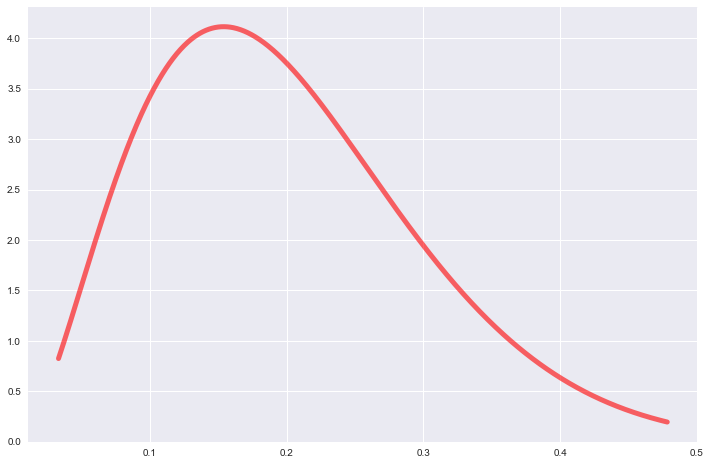

In [138]:
plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

In [139]:
r = beta.rvs(a, b, size=1000)

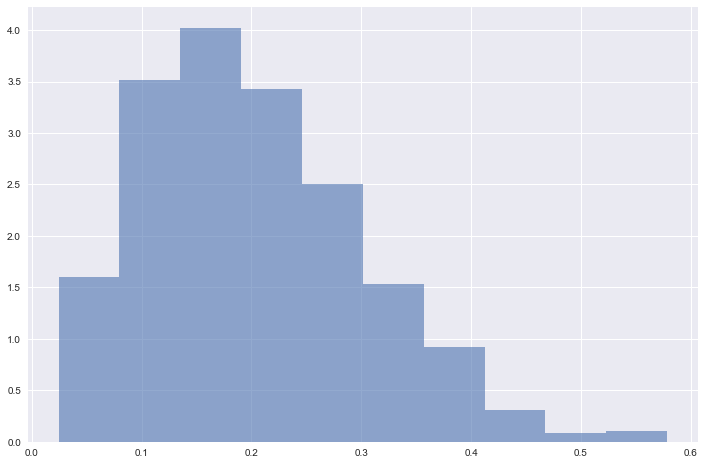

In [140]:
plt.hist(r, density=True, histtype='stepfilled', alpha=0.6)
plt.show()

In [141]:
print("Mean of r: ",r.mean())
print("Variance of r: ", r.var())

Mean of r:  0.2020578744730235
Variance of r:  0.009829112321451979


In [142]:
print("95% quantile: ", np.quantile(r, 0.95))

95% quantile:  0.3791310658672244


# 3) Bayes theorem

Probability of having lung cancer = 0.1% <br/>
Probability of not having lung cancer = 99.9% <br/>
P(Test gives positive | Subject does not have lung cancer) = 4% <br/>
P(Test gives positive | Subject has lung cancer) = 98% <br/>
P(Test gives negative | Subject does not have lung cancer) = 96% <br/>
P(Test gives negative | Subject has lung cancer) = 2% <br/>
P(Test gives positive and Subject has lung cancer)(True positive) = 0.098% <br/>
P(Test gives negative and Subject has lung cancer)(False negative) = 0.002% <br/>
P(Test gives positive and Subject does not have lung cancer)(False positive) = 3.996% <br/>
P(Test gives negative and Subject does not have lung cancer)(True negative) = 95.904% <br/>
P(Any kind of positive result) = 4.094% <br/>
P(Any kind of negative result) = 95.906% <br/>

From bayes theorem: <br/>
<br/>
P(A|B) = P(B|A) * P(A) / P(B)<br/>
<br/>
P(Subject has lung cancer | Test gives positive) = P(Test gives positive and Subject has lung cancer) / P(Any kind of positive result) <br/>
<br/>
= 0.098% / 4.094% = 2.39..% <br/>

<b>A positive test means you have 2.39% chance of cancer</b> <br/>
<br/>
The tests rate for a false positive is 4%, so there will be many false positives in a given population. For a rare disease, most of the positive test results will be wrong.

# 4) Bayes theorem

In [143]:
import pandas as pd

In [144]:
data = {"Red": [2,4,1], "White": [5,1,3]}
df = pd.DataFrame(data, index=["A","B","C"])

In [145]:
P_A = 0.4
P_B = 0.1
P_C = 0.5
probs = {"A": P_A,"B": P_B,"C": P_C}

In [146]:
df

,Red,White
A,2,5
B,4,1
C,1,3


In [147]:
def p_red(boxes):
    ret = 0
    for idx, row in boxes.iterrows():
        portion_of_red = row["Red"] / (row["Red"] + row["White"])
        ret += probs[idx] * portion_of_red
    return ret

In [148]:
p_red(df)

0.3192857142857143

In [149]:
def b_box(boxes):
    p_red_value = p_red(boxes)
    ret = []
    for idx in boxes.index:
        portion_of_red = boxes.loc[idx]["Red"] / (boxes.loc[idx]["Red"] + boxes.loc[idx]["White"])
        ret.append(probs[idx] * portion_of_red / p_red_value)
    return ret

In [150]:
b_box(df)

[0.35794183445190153, 0.25055928411633116, 0.39149888143176736]

# 5) Bayes theorem

In [151]:
def p_identical_twin(fraternal_prob, identical_prob):
    p_identical_twin_and_twin_brother = 0.5 * identical_prob
    p_fraternal_twin_and_twin_brother = 0.5 * 0.5 * fraternal_prob
    p_twin_brothers = p_identical_twin_and_twin_brother + p_fraternal_twin_and_twin_brother
    identical_twins_twin_brother = p_identical_twin_and_twin_brother / p_twin_brothers
    return identical_twins_twin_brother

In [152]:
p_identical_twin(fraternal_prob=1/150, identical_prob=1/400)

0.42857142857142855